#LSTM and ARIMA with Bollinger Bands Technical Indicator

**Authors:** Gabriel Sposito and Thomas Frentzel

**LSTM**


In [ ]:
!pip install ta

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dropout, LSTM, Dense
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from ta.trend import CCIIndicator, MACD
from ta.momentum import RSIIndicator
from ta.volatility import BollingerBands
from ta.trend import PSARIndicator

In [ ]:
base = pd.read_csv('Intel 5Y.csv')
base.head()

,Date,Close/Last,Volume,Open,High,Low
0,10/08/2024,$23.32,58650460,$22.25,$23.42,$22.045
1,10/07/2024,$22.38,54928670,$22.40,$22.65,$22.0209
2,10/04/2024,$22.59,49966930,$22.70,$22.91,$22.30
3,10/03/2024,$22.26,49565930,$22.14,$22.73,$21.65
4,10/02/2024,$22.39,59033900,$22.67,$23.0668,$22.35


In [ ]:
#Removing nule results
base.dropna()

,Date,Close/Last,Volume,Open,High,Low
0,10/08/2024,$23.32,58650460,$22.25,$23.42,$22.045
1,10/07/2024,$22.38,54928670,$22.40,$22.65,$22.0209
2,10/04/2024,$22.59,49966930,$22.70,$22.91,$22.30
3,10/03/2024,$22.26,49565930,$22.14,$22.73,$21.65
4,10/02/2024,$22.39,59033900,$22.67,$23.0668,$22.35
...,...,...,...,...,...,...
1253,10/15/2019,$52.65,18970760,$51.93,$53.07,$51.83
1254,10/14/2019,$51.64,16425530,$51.90,$51.95,$51.44
1255,10/11/2019,$52.09,24167110,$52.00,$52.79,$51.82
1256,10/10/2019,$51.11,14611660,$50.41,$51.775,$50.40


In [ ]:
# Removing $
base['Close/Last'] = base['Close/Last'].str.replace('$', '')
base['Open'] = base['Open'].str.replace('$', '')
base['High'] = base['High'].str.replace('$', '')
base['Low'] = base['Low'].str.replace('$', '')

# Converting str to float
base['Close/Last'] = base['Close/Last'].astype(float)
base['Open'] = base['Open'].astype(float)
base['High'] = base['High'].astype(float)
base['Low'] = base['Low'].astype(float)

In [ ]:
cci = CCIIndicator(high=base['High'], low=base['Low'], close=base['Close/Last'], window=20, constant=0.015)
base['CCI'] = cci.cci()

sma_tp = base['High'] + base['Low'] + base['Close/Last'] / 3
sma_tp = sma_tp.rolling(window=20).mean()
mean_deviation = np.mean(np.abs(base['Close/Last'] - sma_tp))

rsi = RSIIndicator(close=base['Close/Last'], window=14)
base['RSI'] = rsi.rsi()

macd = MACD(close=base['Close/Last'], window_slow=26, window_fast=12, window_sign=9)
base['MACD'] = macd.macd()
base['MACD_Signal'] = macd.macd_signal()
base['MACD_Diff'] = macd.macd_diff()

psar = PSARIndicator(high=base['High'], low=base['Low'], close=base['Close/Last'])
base['Parabolic_SAR'] = psar.psar()

bollinger = BollingerBands(close=base['Close/Last'], window=20, window_dev=2)
base['Bollinger_High'] = bollinger.bollinger_hband()
base['Bollinger_Low'] = bollinger.bollinger_lband()
base['Bollinger_Middle'] = bollinger.bollinger_mavg()
base['Bollinger_Width'] = bollinger.bollinger_wband()

base.dropna()

,Date,Close/Last,Volume,Open,High,Low,CCI,RSI,MACD,MACD_Signal,MACD_Diff,Parabolic_SAR,Bollinger_High,Bollinger_Low,Bollinger_Middle,Bollinger_Width
33,08/21/2024,21.41,57028870,21.072,21.440,21.0700,109.236141,54.112274,-0.365474,-0.606827,0.241353,19.455067,21.792245,18.378755,20.08550,16.994799
34,08/20/2024,20.99,84161270,21.210,21.230,20.8200,82.525909,51.262625,-0.290474,-0.543556,0.253082,19.561664,21.823466,18.369534,20.09650,17.186732
35,08/19/2024,21.52,65956300,20.885,21.860,20.8350,124.006703,54.517618,-0.186125,-0.472070,0.285945,19.663997,21.834038,18.363962,20.09900,17.264916
36,08/16/2024,20.87,48582660,20.530,20.895,20.4101,57.383431,50.098507,-0.154100,-0.408476,0.254376,19.762238,21.828382,18.365618,20.09700,17.230254
37,08/15/2024,20.69,84814880,20.320,21.060,20.2300,46.431701,48.916029,-0.141612,-0.355103,0.213491,19.856548,21.886088,18.410912,20.14850,17.247812
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,10/15/2019,52.65,18970760,51.930,53.070,51.8300,-68.893127,32.656899,-1.587661,-1.307755,-0.279905,53.235976,60.363386,49.940114,55.15175,18.899260
1254,10/14/2019,51.64,16425530,51.900,51.950,51.4400,-81.645295,28.543524,-1.611303,-1.368465,-0.242838,53.070000,60.025053,49.607447,54.81625,19.004594
1255,10/11/2019,52.09,24167110,52.000,52.790,51.8200,-59.811562,32.615978,-1.575567,-1.409885,-0.165681,51.029100,59.591590,49.422910,54.50725,18.655647
1256,10/10/2019,51.11,14611660,50.410,51.775,50.4000,-83.377075,28.770423,-1.607790,-1.449466,-0.158323,52.790000,59.176915,49.143585,54.16025,18.525264


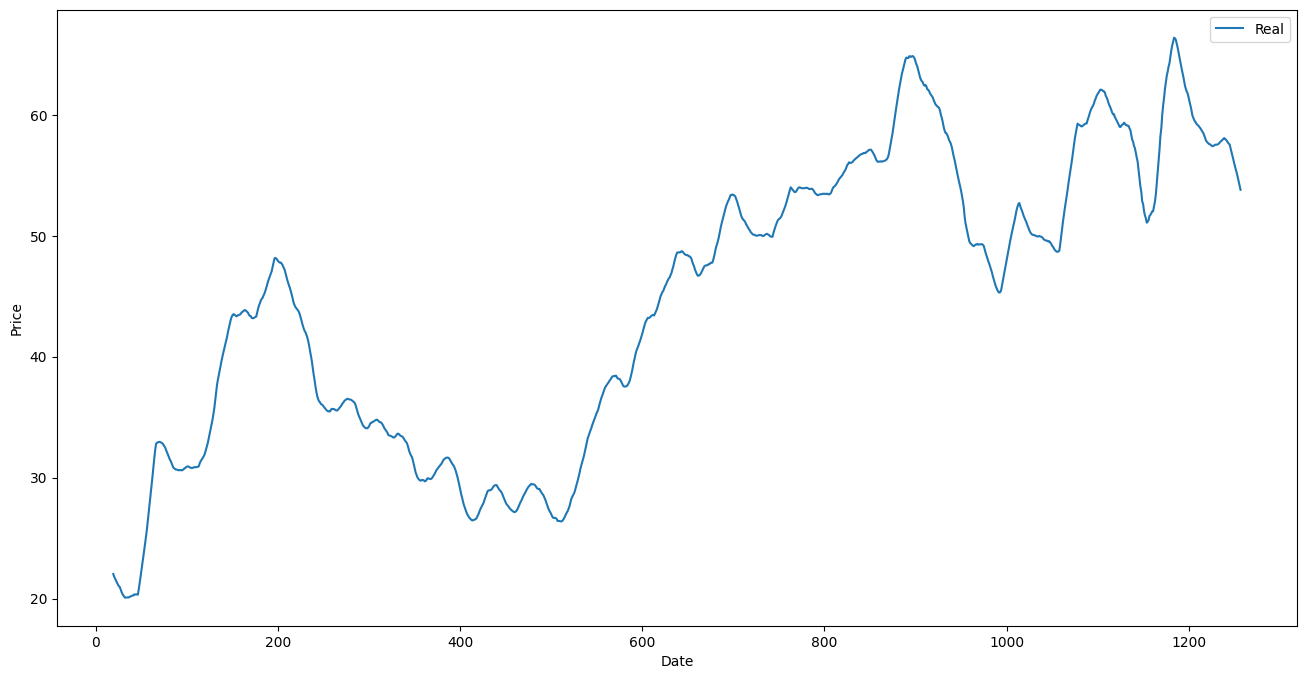

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(base['Bollinger_Middle'], label='Real')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

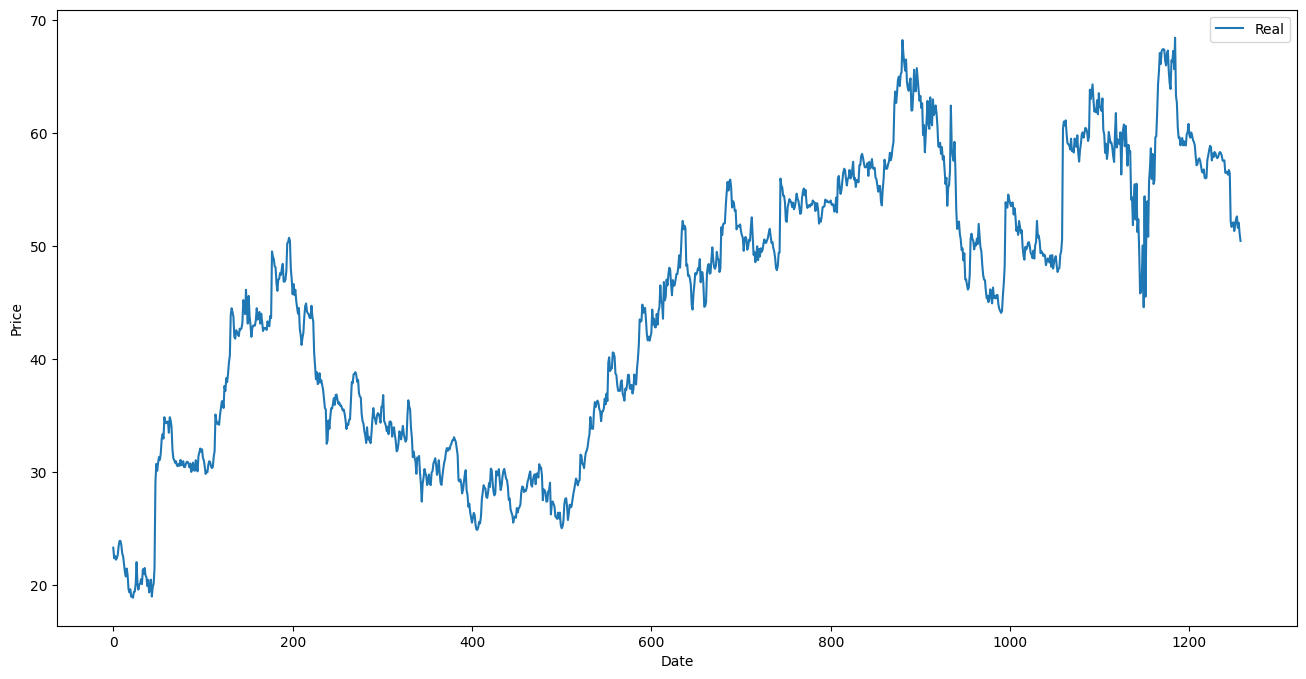

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(base['Close/Last'], label='Real')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

In [ ]:
# Converting indicator values ​​to numeric values ​​and removing NaN values
base = base.replace([np.inf, -np.inf], np.nan)
base = base.dropna()

In [ ]:
# Normalizing the data of real values
scaler_real_value = MinMaxScaler(feature_range=(0, 1))
scaled_data_real_value = scaler_real_value.fit_transform(np.array(base['Close/Last']).reshape(-1, 1))

In [ ]:
window_size_real_value = 10
forecasters_real_value = []
real_value_of_prices = []
for i in range(window_size_real_value, len(base)):
    forecasters_real_value.append(scaled_data_real_value[i - window_size_real_value:i, 0])
    real_value_of_prices.append(scaled_data_real_value[i, 0])

forecasters_real_value, real_value_of_prices = np.array(forecasters_real_value), np.array(real_value_of_prices)
forecasters_real_value = np.reshape(forecasters_real_value, (forecasters_real_value.shape[0], forecasters_real_value.shape[1], 1))

In [ ]:
#dividindo a coluna close/last em 70% treino e 30% teste com trai_test_split
Xtrain_real_lstm, Xtest_real_lstm, ytrain_real_lstm, ytest_real_lstm = train_test_split(forecasters_real_value, real_value_of_prices,
                                                                                        test_size = 0.3, shuffle = False)

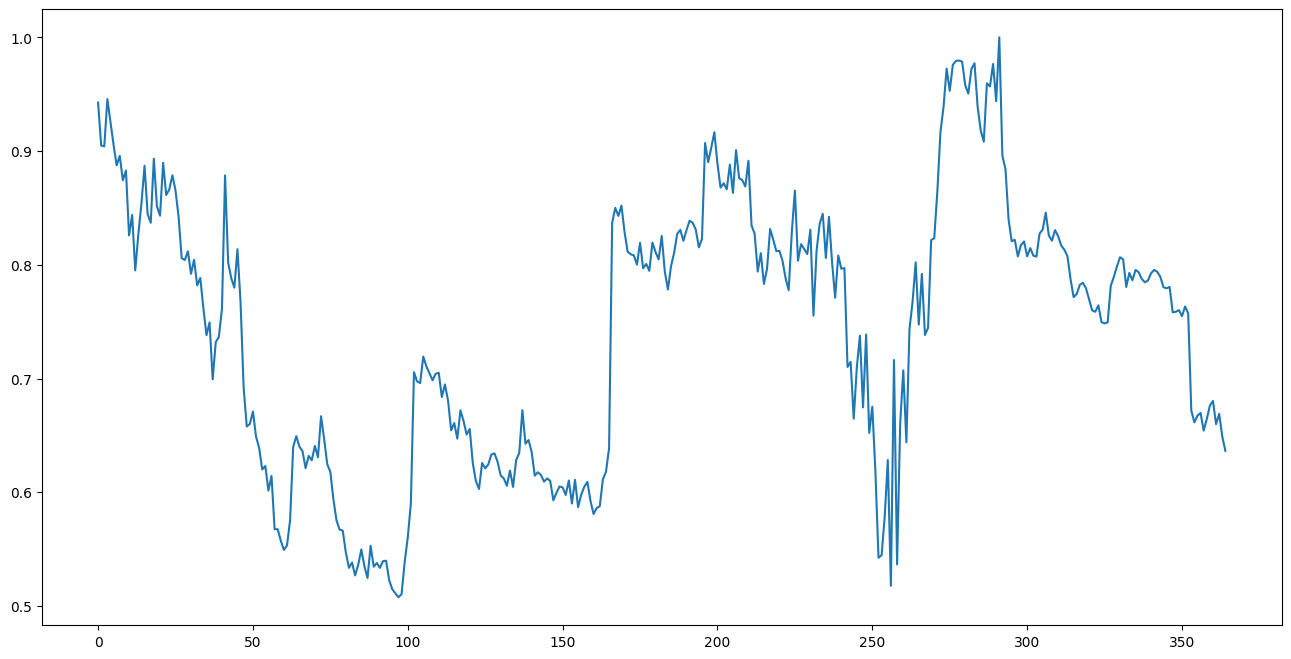

In [ ]:
#plotando grafico dos valores de teste
plt.figure(figsize=(16,8))
plt.plot(ytest_real_lstm)
plt.show()

In [ ]:
# Normalizing the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(np.array(base['Bollinger_Middle']).reshape(-1, 1))

In [ ]:
window_size = 10
forecasters = []
real_value = []
for i in range(window_size, len(base)):
    forecasters.append(scaled_data[i - window_size:i, 0])
    real_value.append(scaled_data[i, 0])

forecasters, real_value = np.array(forecasters), np.array(real_value)
forecasters = np.reshape(forecasters, (forecasters.shape[0], forecasters.shape[1], 1))

In [ ]:
# Separating data between training and testing
X_train, X_test, y_train, y_test = train_test_split(forecasters, real_value, test_size=0.3, shuffle=False)

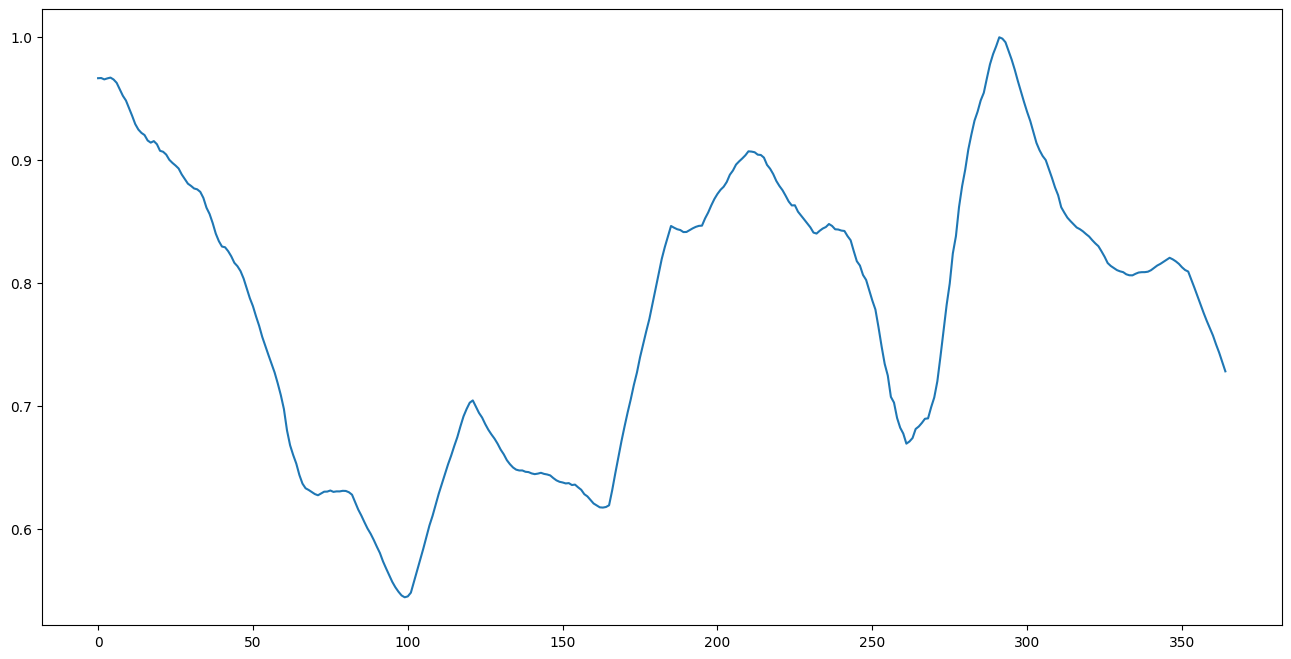

In [ ]:
# Showing test set in graph
plt.figure(figsize=(16, 8))
plt.plot(y_test)
plt.show()

In [ ]:
# LSTM model

lstm = Sequential()
lstm.add(LSTM(units=50, return_sequences=True, input_shape=(forecasters.shape[1], 1)))
lstm.add(Dropout(0.3))
lstm.add(LSTM(units=50, return_sequences=True))
lstm.add(Dropout(0.3))
lstm.add(LSTM(units=50))
lstm.add(Dropout(0.3))
lstm.add(Dense(units=1))
lstm.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
history = lstm.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - loss: 0.0856 - mean_absolute_error: 0.2303 - val_loss: 0.0154 - val_mean_absolute_error: 0.1133
Epoch 2/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0085 - mean_absolute_error: 0.0759 - val_loss: 0.0024 - val_mean_absolute_error: 0.0433
Epoch 3/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0050 - mean_absolute_error: 0.0519 - val_loss: 0.0019 - val_mean_absolute_error: 0.0344
Epoch 4/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0054 - mean_absolute_error: 0.0536 - val_loss: 0.0037 - val_mean_absolute_error: 0.0482
Epoch 5/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0047 - mean_absolute_error: 0.0518 - val_loss: 0.0017 - val_mean_absolute_error: 0.0312
Epoch 6/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0043 - mean_absolute_error: 0.0470 - val_loss: 0.0017 - val_mean_absolute_error: 0.0304
Epoch 7/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0038 - mean_absolute_error: 0.0463 - v

In [ ]:
test_predictions = lstm.predict(X_test)
test_predictions = scaler.inverse_transform(test_predictions)

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step


In [ ]:
# Transforming test values ​​back to original values
y_orig_test = scaler.inverse_transform(y_test.reshape(-1, 1))

#escalonando valores de teste
ytest_real_lstm = scaler_real_value.inverse_transform(ytest_real_lstm.reshape(-1, 1))

In [ ]:
test_predictions = test_predictions.ravel()  # Converts to 1D
y_orig_test = y_orig_test.ravel()
ytest_real_lstm = ytest_real_lstm.ravel()

In [ ]:
print(test_predictions.shape)
print(y_orig_test.shape)

(365,)
(365,)


In [ ]:
test_size_L = len(y_test)

close_test_L = base['Close/Last'].tail(test_size_L)

In [ ]:
# Inverse Bollinger Bands formula
def Bandas_Bollinger_Middle_inverse(bollinger_values_L, close_values_L, window=20):
    original_prices = []

    for i in range(len(bollinger_values_L)):
        if i < window:
            # For the first values, where there is not enough data to calculate the SMA, we keep the original closing value
            original_prices.append(close_values_L[i])
            continue

       # Calculates the simple moving average (SMA) of the last 'window' periods
        middle_ma = np.mean(close_values_L[i-window:i])

        # Using the ratio between the predicted middle band value and the actual SMA value assuming that the middle band value (bollinger_values_L[i]) represents an estimate of the SMA
        estimated_price = bollinger_values_L[i] + (close_values_L[i] - middle_ma)

        original_prices.append(estimated_price)

    return np.array(original_prices)

# Making sure the data is in array format
close_test_L = close_test_L.values if isinstance(close_test_L, pd.Series) else close_test_L

In [ ]:
# Inverting the values ​​test_predictions and y_orig_teste by the inverse Parabolic SAR formula
test_predictions_inverted = Bandas_Bollinger_Middle_inverse(test_predictions, close_test_L)
y_orig_test_inverted = Bandas_Bollinger_Middle_inverse(y_orig_test, close_test_L)

min_length = min(len(ytest_real_lstm), len(test_predictions_inverted))
ytest_real_lstm = ytest_real_lstm[:min_length]
test_predictions_inverted = test_predictions_inverted[:min_length]

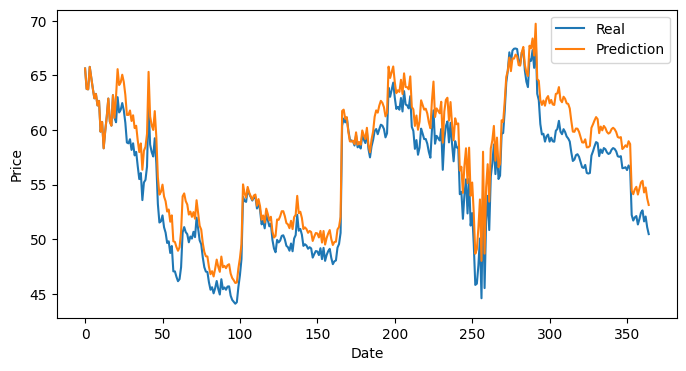

In [ ]:
plt.figure(figsize=(8, 4))
plt.plot(range(len(ytest_real_lstm)), ytest_real_lstm, label='Real')
plt.plot(range(len(test_predictions_inverted)), test_predictions_inverted, label='Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
# R2 Score
r2 = r2_score(ytest_real_lstm, test_predictions_inverted)
print(f'R2 Score: {r2}')

# RMSE
rmse = np.sqrt(np.mean((ytest_real_lstm - test_predictions_inverted) ** 2))
print(f'RMSE: {rmse}')

R2 Score: 0.8777879772496996
RMSE: 2.043140133555235


**ARIMA**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from ta.trend import CCIIndicator, MACD
from ta.momentum import RSIIndicator
from ta.volatility import BollingerBands
from ta.trend import PSARIndicator
from math import sqrt

In [ ]:
base_A = pd.read_csv('Intel 5Y.csv')
base_A.head()

,Date,Close/Last,Volume,Open,High,Low
0,10/08/2024,$23.32,58650460,$22.25,$23.42,$22.045
1,10/07/2024,$22.38,54928670,$22.40,$22.65,$22.0209
2,10/04/2024,$22.59,49966930,$22.70,$22.91,$22.30
3,10/03/2024,$22.26,49565930,$22.14,$22.73,$21.65
4,10/02/2024,$22.39,59033900,$22.67,$23.0668,$22.35


In [ ]:
base_A.dtypes

,0
Date,object
Close/Last,object
Volume,int64
Open,object
High,object
Low,object


In [ ]:
# Removing $
base_A['Close/Last'] = base_A['Close/Last'].str.replace('$', '')
base_A['Open'] = base_A['Open'].str.replace('$', '')
base_A['High'] = base_A['High'].str.replace('$', '')
base_A['Low'] = base_A['Low'].str.replace('$', '')

# Converting str to float
base_A['Close/Last'] = base_A['Close/Last'].astype(float)
base_A['Open'] = base_A['Open'].astype(float)
base_A['High'] = base_A['High'].astype(float)
base_A['Low'] = base_A['Low'].astype(float)

In [ ]:
cci = CCIIndicator(high=base_A['High'], low=base_A['Low'], close=base_A['Close/Last'], window=20, constant=0.015)
base_A['CCI'] = cci.cci()

sma_tp = base_A['High'] + base_A['Low'] + base_A['Close/Last'] / 3
sma_tp = sma_tp.rolling(window=20).mean()
mean_deviation = np.mean(np.abs(base_A['Close/Last'] - sma_tp))

rsi = RSIIndicator(close=base_A['Close/Last'], window=14)
base_A['RSI'] = rsi.rsi()

macd = MACD(close=base_A['Close/Last'], window_slow=26, window_fast=12, window_sign=9)
base_A['MACD'] = macd.macd()
base_A['MACD_Signal'] = macd.macd_signal()
base_A['MACD_Diff'] = macd.macd_diff()

psar = PSARIndicator(high=base_A['High'], low=base_A['Low'], close=base_A['Close/Last'])
base_A['Parabolic_SAR'] = psar.psar()

bollinger = BollingerBands(close=base_A['Close/Last'], window=20, window_dev=2)
base_A['Bollinger_High'] = bollinger.bollinger_hband()
base_A['Bollinger_Low'] = bollinger.bollinger_lband()
base_A['Bollinger_Middle'] = bollinger.bollinger_mavg()
base_A['Bollinger_Width'] = bollinger.bollinger_wband()

base_A.dropna()

,Date,Close/Last,Volume,Open,High,Low,CCI,RSI,MACD,MACD_Signal,MACD_Diff,Parabolic_SAR,Bollinger_High,Bollinger_Low,Bollinger_Middle,Bollinger_Width
33,08/21/2024,21.41,57028870,21.072,21.440,21.0700,109.236141,54.112274,-0.365474,-0.606827,0.241353,19.455067,21.792245,18.378755,20.08550,16.994799
34,08/20/2024,20.99,84161270,21.210,21.230,20.8200,82.525909,51.262625,-0.290474,-0.543556,0.253082,19.561664,21.823466,18.369534,20.09650,17.186732
35,08/19/2024,21.52,65956300,20.885,21.860,20.8350,124.006703,54.517618,-0.186125,-0.472070,0.285945,19.663997,21.834038,18.363962,20.09900,17.264916
36,08/16/2024,20.87,48582660,20.530,20.895,20.4101,57.383431,50.098507,-0.154100,-0.408476,0.254376,19.762238,21.828382,18.365618,20.09700,17.230254
37,08/15/2024,20.69,84814880,20.320,21.060,20.2300,46.431701,48.916029,-0.141612,-0.355103,0.213491,19.856548,21.886088,18.410912,20.14850,17.247812
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,10/15/2019,52.65,18970760,51.930,53.070,51.8300,-68.893127,32.656899,-1.587661,-1.307755,-0.279905,53.235976,60.363386,49.940114,55.15175,18.899260
1254,10/14/2019,51.64,16425530,51.900,51.950,51.4400,-81.645295,28.543524,-1.611303,-1.368465,-0.242838,53.070000,60.025053,49.607447,54.81625,19.004594
1255,10/11/2019,52.09,24167110,52.000,52.790,51.8200,-59.811562,32.615978,-1.575567,-1.409885,-0.165681,51.029100,59.591590,49.422910,54.50725,18.655647
1256,10/10/2019,51.11,14611660,50.410,51.775,50.4000,-83.377075,28.770423,-1.607790,-1.449466,-0.158323,52.790000,59.176915,49.143585,54.16025,18.525264


In [ ]:
# Converting indicator values ​​to numeric values ​​and removing NaN values
base_A = base_A.replace([np.inf, -np.inf], np.nan)
base_A = base_A.dropna()

In [ ]:
base_A.head()

,Date,Close/Last,Volume,Open,High,Low,CCI,RSI,MACD,MACD_Signal,MACD_Diff,Parabolic_SAR,Bollinger_High,Bollinger_Low,Bollinger_Middle,Bollinger_Width
33,08/21/2024,21.41,57028870,21.072,21.440,21.0700,109.236141,54.112274,-0.365474,-0.606827,0.241353,19.455067,21.792245,18.378755,20.0855,16.994799
34,08/20/2024,20.99,84161270,21.210,21.230,20.8200,82.525909,51.262625,-0.290474,-0.543556,0.253082,19.561664,21.823466,18.369534,20.0965,17.186732
35,08/19/2024,21.52,65956300,20.885,21.860,20.8350,124.006703,54.517618,-0.186125,-0.472070,0.285945,19.663997,21.834038,18.363962,20.0990,17.264916
36,08/16/2024,20.87,48582660,20.530,20.895,20.4101,57.383431,50.098507,-0.154100,-0.408476,0.254376,19.762238,21.828382,18.365618,20.0970,17.230254
37,08/15/2024,20.69,84814880,20.320,21.060,20.2300,46.431701,48.916029,-0.141612,-0.355103,0.213491,19.856548,21.886088,18.410912,20.1485,17.247812


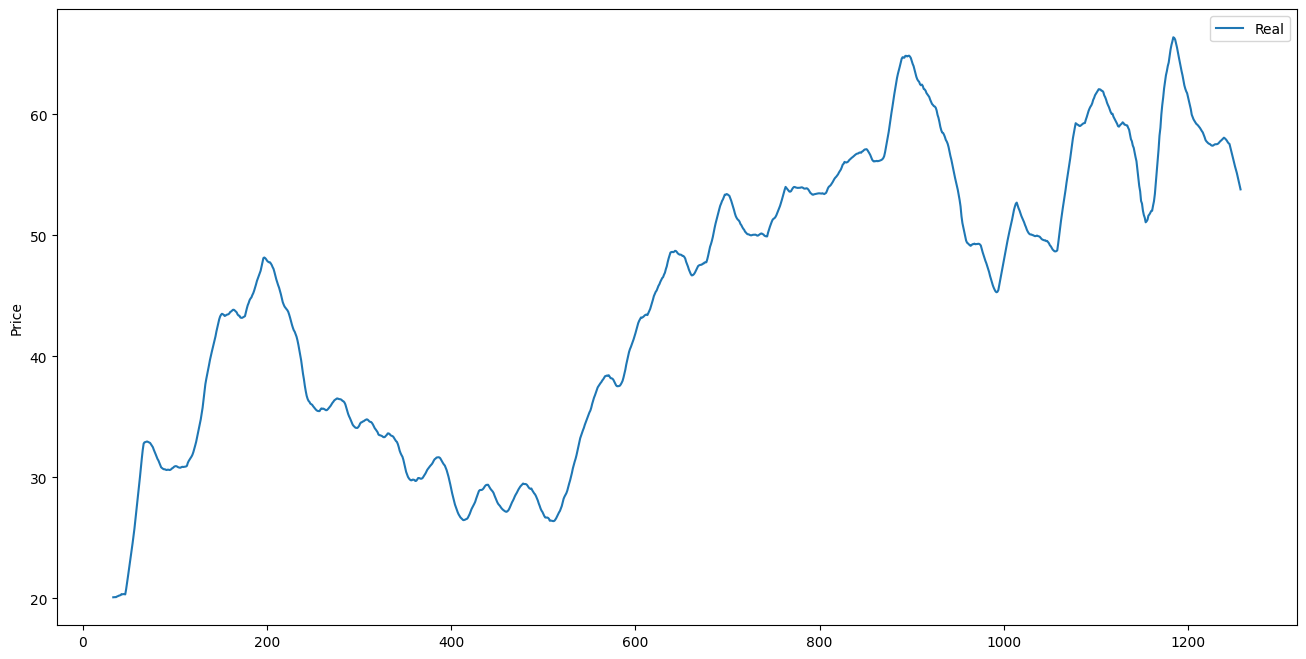

In [ ]:
# Plotting Bollinger Bands
plt.figure(figsize=(16,8))
plt.plot(base_A['Bollinger_Middle'], label='Real')
plt.ylabel('Price')
plt.legend()

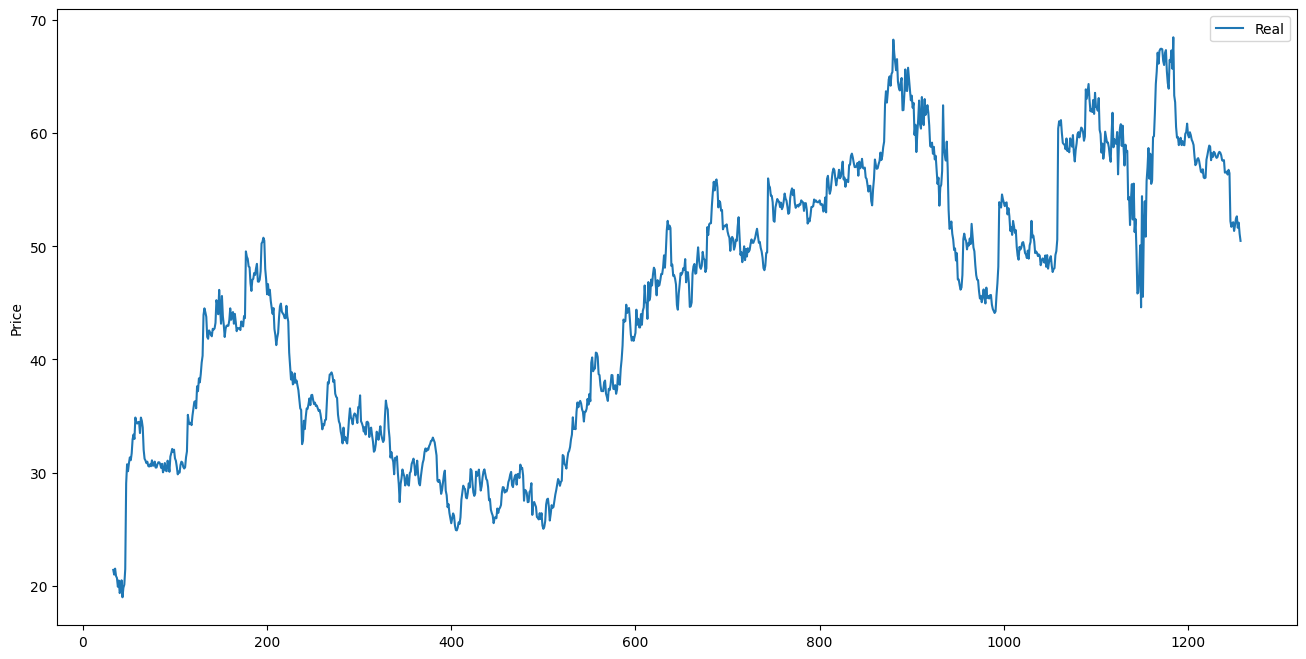

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(base_A['Close/Last'], label='Real')
plt.ylabel('Price')
plt.legend()

In [ ]:
X_R = base_A['Close/Last'].values
size_R = int(len(X_R) * 0.70)
train_R, test_R = X_R[0:size_R], X_R[size_R:len(X_R)]
history_R = [x_r for x_r in train_R]
forecasts_R = list()

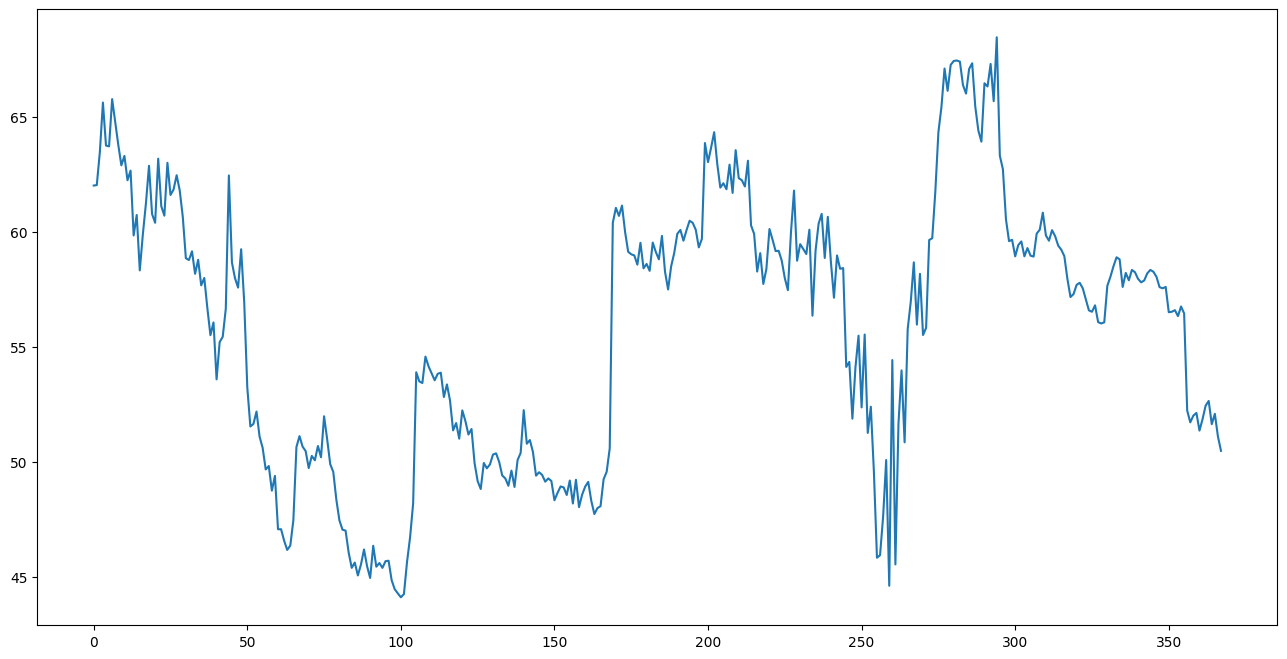

In [ ]:
#Test Grafic
plt.figure(figsize=(16, 8))
plt.plot(test_R)
plt.show()

In [ ]:
# Addfuller for Bollinger Bands Middle
result = adfuller(base_A['Bollinger_Middle'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

ADF Statistic: -1.7490693852790196
p-value: 0.40602408164269327


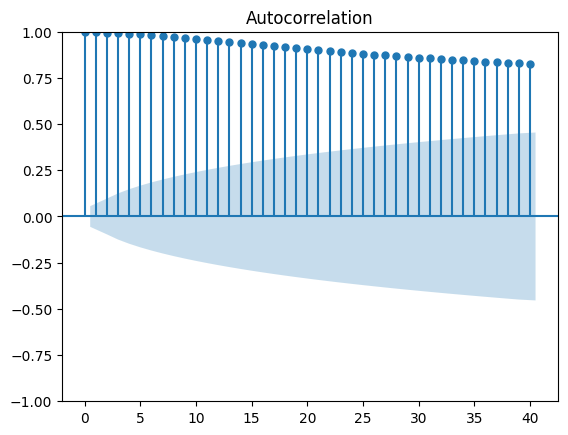

In [ ]:
plot_acf(base_A['Bollinger_Middle'], lags=40)
plt.show()

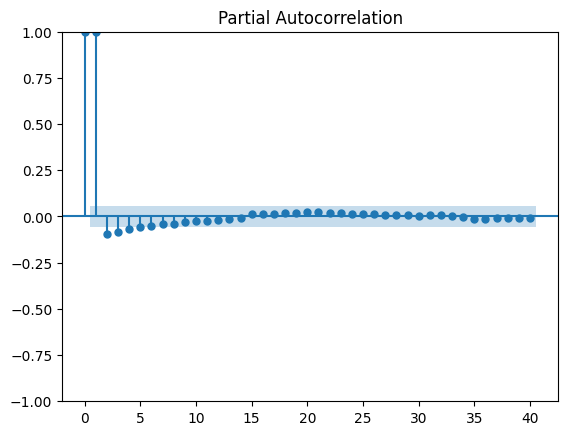

In [ ]:
plot_pacf(base_A['Bollinger_Middle'], lags=40)
plt.show()

In [ ]:
X = base_A['Bollinger_Middle'].values
size = int(len(X) * 0.70)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
forecasts = list()

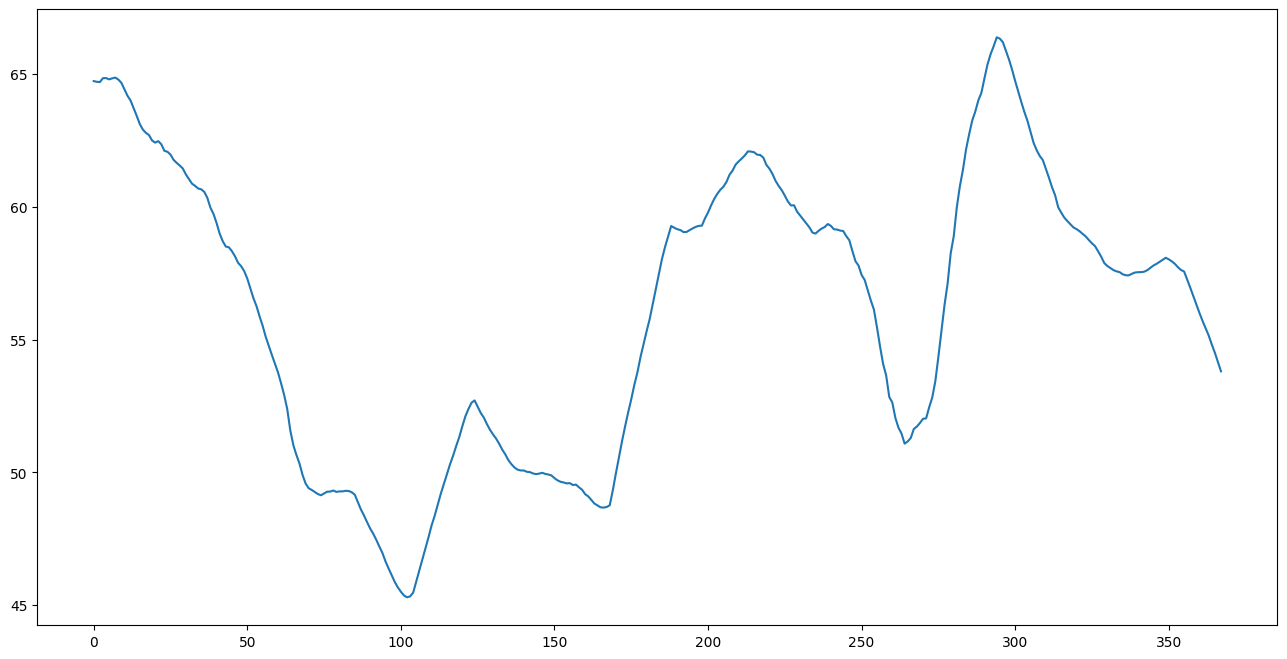

In [ ]:
plt.figure(figsize=(16, 8))
plt.plot(test)
plt.show()

In [ ]:
# ARIMA
for t in range(len(test)):
    model = ARIMA(history, order=(2, 1, 1))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    forecasts.append(yhat)
    obs = test[t]
    history.append(obs)
    print(f'Expected={yhat}, Observed={obs}')

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Expected=64.86371099288723, Observed=64.72775
Expected=64.86661540805463, Observed=64.70125
Expected=64.66058442693485, Observed=64.69025
Expected=64.69594762913214, Observed=64.83675
Expected=64.96791694151113, Observed=64.84325
Expected=64.84963410572274, Observed=64.792
Expected=64.73999886562852, Observed=64.83000000000001
Expected=64.87426767494848, Observed=64.8595
Expected=64.87885611487424, Observed=64.788
Expected=64.72324878294303, Observed=64.66275
Expected=64.53796037322968, Observed=64.41525
Expected=64.17961029633797, Observed=64.17525
Expected=63.948706746173336, Observed=63.99625000000001
Expected=63.82862959808946, Observed=63.71075
Expected=63.43169433177628, Observed=63.42075


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Expected=63.15309375257042, Observed=63.10975
Expected=62.80559083380243, Observed=62.90475
Expected=62.72473491454358, Observed=62.77825
Expected=62.64810090896184, Observed=62.69725
Expected=62.63296579565894, Observed=62.49274999999999
Expected=62.27988545584754, Observed=62.41175
Expected=62.35964233748086, Observed=62.46925
Expected=62.50597961891157, Observed=62.35124999999999
Expected=62.24781693852319, Observed=62.10525
Expected=61.86904697779067, Observed=62.067750000000004
Expected=62.0395596598522, Observed=61.962
Expected=61.86392452988596, Observed=61.765499999999996
Expected=61.57851246436058, Observed=61.65
Expected=61.54305966374253, Observed=61.551
Expected=61.460306275546884, Observed=61.439
Expected=61.33553674724878, Observed=61.216499999999996
Expected=61.004798287029764, Observed=61.04299999999999
Expected=60.88025009569223, Observed=60.86750000000001
Expected=60.70289754616075, Observed=60.784000000000006
Expected=60.70985571970661, Observed=60.6865
Expected=60.5

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Expected=57.95565362660788, Observed=57.88924999999999
Expected=57.66085579565301, Observed=57.76125
Expected=57.64703294182789, Observed=57.57574999999999
Expected=57.405016349479105, Observed=57.29475
Expected=57.03070197548761, Observed=56.93275
Expected=56.58990620233355, Observed=56.557249999999996
Expected=56.199968141794564, Observed=56.25775
Expected=55.97774575609837, Observed=55.87325


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Expected=55.51034579425222, Observed=55.51975000000001
Expected=55.1874128271818, Observed=55.10325
Expected=54.710147553706754, Observed=54.75975000000001
Expected=54.43965838451167, Observed=54.421749999999996
Expected=54.106655639248295, Observed=54.088
Expected=53.77728273111941, Observed=53.762
Expected=53.459053532313995, Observed=53.355000000000004
Expected=52.97269685623901, Observed=52.911500000000004


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Expected=52.49371389796053, Observed=52.387
Expected=51.89010390542286, Observed=51.58200000000001


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Expected=50.80822914374794, Observed=51.0215
Expected=50.492673981438756, Observed=50.6545
Expected=50.31734300473667, Observed=50.3315
Expected=50.03305259968208, Observed=49.902249999999995
Expected=49.49382721058061, Observed=49.578250000000004
Expected=49.27484425154449, Observed=49.402750000000005
Expected=49.24371671126452, Observed=49.33875
Expected=49.28555547840135, Observed=49.25975
Expected=49.18659992920862, Observed=49.18475
Expected=49.114524082187785, Observed=49.13975000000001
Expected=49.09870963717664, Observed=49.2085
Expected=49.278796226714086, Observed=49.2745
Expected=49.338291891694844, Observed=49.278499999999994
Expected=49.279920434653484, Observed=49.319
Expected=49.35819451282422, Observed=49.267
Expected=49.21427416524965, Observed=49.285999999999994
Expected=49.305684500468985, Observed=49.285000000000004
Expected=49.28382342224747, Observed=49.307
Expected=49.3286150766392, Observed=49.3015
Expected=49.295502687851574, Observed=49.253
Expected=49.2051949

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Expected=49.916802801916376, Observed=49.934999999999995
Expected=49.91236364860342, Observed=49.9545
Expected=49.97611166025891, Observed=49.985
Expected=50.015751114611376, Observed=49.9445
Expected=49.90274659786446, Observed=49.9225
Expected=49.90148383722846, Observed=49.8865
Expected=49.85162842017478, Observed=49.787
Expected=49.68900426742404, Observed=49.701
Expected=49.61917798319738, Observed=49.647499999999994
Expected=49.598877137090874, Observed=49.6215
Expected=49.59947536157796, Observed=49.5855
Expected=49.553072354041234, Observed=49.596999999999994
Expected=49.61124664831708, Observed=49.5255
Expected=49.454393488825836, Observed=49.541
Expected=49.55927883757368, Observed=49.4385
Expected=49.3399923919679, Observed=49.3475
Expected=49.26077465506728, Observed=49.181
Expected=49.02032627062938, Observed=49.098
Expected=49.0203183983984, Observed=48.9655
Expected=48.83932292377742, Observed=48.8305
Expected=48.702308452739054, Observed=48.760000000000005
Expected=48.6

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Expected=48.672037917180724, Observed=48.698
Expected=48.72295029684478, Observed=48.76350000000001


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Expected=48.83168882652432, Observed=49.325
Expected=49.88210967822146, Observed=49.961
Expected=50.583875031721604, Observed=50.5635
Expected=51.139155440359964, Observed=51.1745
Expected=51.754008955865096, Observed=51.730000000000004
Expected=52.250285787311775, Observed=52.259
Expected=52.752748000176965, Observed=52.751
Expected=53.21754371231455, Observed=53.290499999999994
Expected=53.802792117501255, Observed=53.75849999999999
Expected=54.197955537231294, Observed=54.3335
Expected=54.87798852636035, Observed=54.826
Expected=55.284592458355036, Observed=55.310500000000005
Expected=55.76312937955275, Observed=55.76950000000001
Expected=56.19619334844779, Observed=56.33149999999999
Expected=56.86034523176558, Observed=56.90150000000001
Expected=57.437339084551795, Observed=57.44250000000001
Expected=57.94856988400876, Observed=58.030499999999996
Expected=58.582848958316525, Observed=58.48199999999999
Expected=58.89764561682376, Observed=58.878499999999995
Expected=59.2397367605701

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Expected=59.63598615862688, Observed=59.209


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Expected=59.109656006180956, Observed=59.152499999999996


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Expected=59.068774054104495, Observed=59.122
Expected=59.06814216238445, Observed=59.04549999999999
Expected=58.94891632956821, Observed=59.0495
Expected=59.03599500912345, Observed=59.117000000000004
Expected=59.16841684153698, Observed=59.185500000000005
Expected=59.239196200151575, Observed=59.241499999999995
Expected=59.28394037830483, Observed=59.27900000000001
Expected=59.30421472877263, Observed=59.2875
Expected=59.28512463649578, Observed=59.56
Expected=59.83035018200231, Observed=59.781499999999994
Expected=59.98985797216071, Observed=60.0495
Expected=60.30341419830958, Observed=60.2895
Expected=60.51492695323515, Observed=60.4815
Expected=60.65902068708828, Observed=60.6375
Expected=60.77944668956372, Observed=60.751999999999995
Expected=60.853233523822496, Observed=60.93150000000001
Expected=61.097372799015, Observed=61.20300000000001
Expected=61.4596579338093, Observed=61.3625
Expected=61.50786000708983, Observed=61.586


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Expected=61.79467483291946, Observed=61.70700000000001
Expected=61.81433201204284, Observed=61.81524999999999
Expected=61.910732078691964, Observed=61.93325
Expected=62.03869079344153, Observed=62.08425
Expected=62.22261013656229, Observed=62.074250000000006
Expected=62.054155731895804, Observed=62.050250000000005
Expected=62.017666329016514, Observed=61.95925000000001
Expected=61.86204144325796, Observed=61.946749999999994
Expected=61.92899734780382, Observed=61.848749999999995
Expected=61.746987929423106, Observed=61.57475000000001
Expected=61.3008138103652, Observed=61.42925
Expected=61.284632562031014, Observed=61.22925
Expected=61.03221712637679, Observed=60.97075000000001
Expected=60.71872157966536, Observed=60.78125
Expected=60.59778908441732, Observed=60.622249999999994
Expected=60.46985662376967, Observed=60.41575
Expected=60.21729973555846, Observed=60.19625
Expected=59.98826615927719, Observed=60.04875
Expected=59.91024887529802, Observed=60.05375
Expected=60.065665784610545

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Expected=59.23596328721165, Observed=59.223
Expected=59.08323498451915, Observed=59.0265
Expected=58.841356272586985, Observed=58.9895
Expected=58.95260150582201, Observed=59.09349999999999
Expected=59.202905963862, Observed=59.178999999999995
Expected=59.26847296309188, Observed=59.2355
Expected=59.29546850737492, Observed=59.349000000000004
Expected=59.46413436209649, Observed=59.277499999999996
Expected=59.21007536459021, Observed=59.150999999999996
Expected=59.02989367848278, Observed=59.14149999999999
Expected=59.13544941443633, Observed=59.1025
Expected=59.06731075614154, Observed=59.0865
Expected=59.07373427718259, Observed=58.8935
Expected=58.7074440850529, Observed=58.7375
Expected=58.588622029900684, Observed=58.3325
Expected=57.93581521263367, Observed=57.9485
Expected=57.60081861009448, Observed=57.7855
Expected=57.6336641372299, Observed=57.430499999999995
Expected=57.091900211743095, Observed=57.2445
Expected=57.08074376532799, Observed=56.855500000000006
Expected=56.4672

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Expected=52.062074899853286, Observed=52.628499999999995
Expected=52.4271327826381, Observed=52.048500000000004
Expected=51.538978096177225, Observed=51.68249999999999
Expected=51.30536522173406, Observed=51.4615
Expected=51.25128056490681, Observed=51.082499999999996
Expected=50.77210422607115, Observed=51.1645
Expected=51.2090150507547, Observed=51.295
Expected=51.42278082681161, Observed=51.635000000000005


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Expected=51.92802779735506, Observed=51.7275
Expected=51.839581551499045, Observed=51.862
Expected=51.97786322903289, Observed=52.019499999999994
Expected=52.16859899999622, Observed=52.034000000000006
Expected=52.05889943674561, Observed=52.4535
Expected=52.88299288490241, Observed=52.81999999999999
Expected=53.12402455999577, Observed=53.428999999999995
Expected=53.9758749897053, Observed=54.354499999999994
Expected=55.209695779151026, Observed=55.33
Expected=56.25494861266415, Observed=56.30499999999999
Expected=57.2288395757178, Observed=57.108000000000004
Expected=57.880997864245856, Observed=58.241
Expected=59.285655436112336, Observed=58.89149999999999
Expected=59.565185023285956, Observed=59.9875


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Expected=61.06557405042314, Observed=60.775


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Expected=61.47139155977609, Observed=61.395500000000006


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Expected=62.01331319755208, Observed=62.153999999999996
Expected=62.86681869009371, Observed=62.71999999999999
Expected=63.27158903050789, Observed=63.239
Expected=63.70272538379009, Observed=63.577999999999996


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Expected=63.90955689847121, Observed=64.0005


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Expected=64.38669224643115, Observed=64.288
Expected=64.56011652253164, Observed=64.8355
Expected=65.35946741477731, Observed=65.3605
Expected=65.84114238433956, Observed=65.7435
Expected=66.10673487391192, Observed=66.0415
Expected=66.3118806187895, Observed=66.377
Expected=66.70201243011861, Observed=66.326
Expected=66.24836700048957, Observed=66.19
Expected=66.08859886757693, Observed=65.862
Expected=65.5206686439069, Observed=65.535
Expected=65.26341662971309, Observed=65.1545
Expected=64.76219690037308, Observed=64.7295
Expected=64.36570666344957, Observed=64.328


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Expected=63.919384728205934, Observed=63.937
Expected=63.60383710435275, Observed=63.564499999999995
Expected=63.183874201452156, Observed=63.2285
Expected=62.94705580619888, Observed=62.822500000000005
Expected=62.406537082118135, Observed=62.402
Expected=62.0428413905867, Observed=62.1255


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Expected=61.83807584973687, Observed=61.9095
Expected=61.73820067100038, Observed=61.754999999999995
Expected=61.58233812910864, Observed=61.424
Expected=61.1341664670034, Observed=61.088499999999996
Expected=60.75404302894163, Observed=60.727
Expected=60.407298044208325, Observed=60.4335
Expected=60.142896601873026, Observed=59.98049999999999


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Expected=59.56398496737858, Observed=59.775999999999996
Expected=59.588531179441794, Observed=59.587
Expected=59.40689211802501, Observed=59.4575
Expected=59.3423636258279, Observed=59.336
Expected=59.21664092338751, Observed=59.218
Expected=59.11335489801328, Observed=59.156000000000006
Expected=59.0949028332295, Observed=59.074
Expected=58.99935367352082, Observed=58.972


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Expected=58.87349016395088, Observed=58.878499999999995
Expected=58.79444984154903, Observed=58.74300000000001
Expected=58.61071534265698, Observed=58.621
Expected=58.512927297994686, Observed=58.515
Expected=58.41048034324785, Observed=58.322500000000005
Expected=58.1434205209035, Observed=58.1185
Expected=57.92587554336793, Observed=57.88000000000001
Expected=57.656682945842284, Observed=57.77049999999999
Expected=57.67434376141008, Observed=57.69199999999999
Expected=57.613743911286136, Observed=57.6135
Expected=57.54480895711845, Observed=57.567499999999995
Expected=57.52127520193865, Observed=57.5375
Expected=57.51339452396012, Observed=57.456500000000005
Expected=57.37427473944768, Observed=57.42
Expected=57.394427564341804, Observed=57.416999999999994
Expected=57.40727501432879, Observed=57.476
Expected=57.54111972991979, Observed=57.5235
Expected=57.55751788958175, Observed=57.53649999999999
Expected=57.55738982131508, Observed=57.5375
Expected=57.529157321826304, Observed=57.5

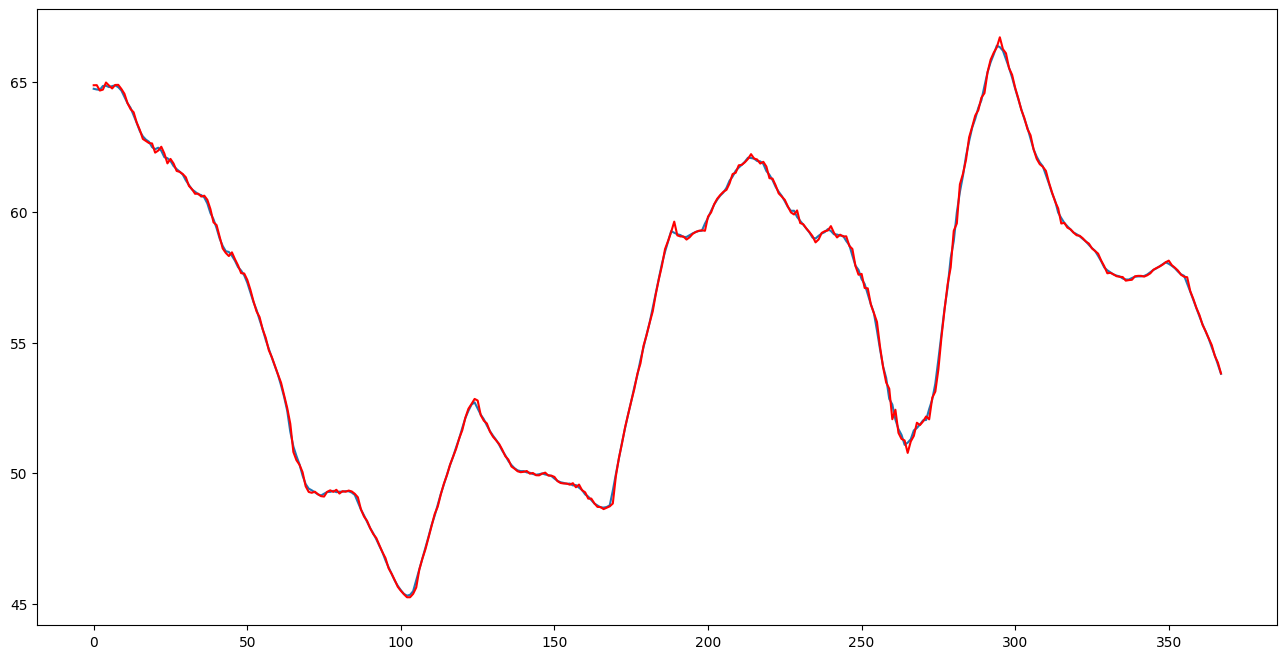

In [ ]:
# Test and forecast set
plt.figure(figsize=(16, 8))
plt.plot(test)
plt.plot(forecasts, color='red')
plt.show()

In [ ]:
# Ensuring that data is one-dimensional
test = test.ravel()
forecasts = np.array(forecasts).ravel()

In [ ]:
# Getting the high, low and close values ​​from the test set for Bollinger Bands
test_size_A = len(test)

close_test_A = base_A['Close/Last'].tail(test_size_A)

In [ ]:
print(test.shape)
print(forecasts.shape)

(368,)
(368,)


In [ ]:
# Inverse Bollinger Bands Formula
def Bandas_Bollinger_Middle_inverse(bollinger_values_A, close_values_A, window=20):
    original_prices = []

    for i in range(len(bollinger_values_A)):
        if i < window:
            # For the first values, where there is not enough data to calculate the SMA, we keep the original closing value
            original_prices.append(close_values_A[i])
            continue

        # Calculates the simple moving average (SMA) of the last 'window' periods
        middle_ma = np.mean(close_values_A[i-window:i])

        # Using the ratio between the predicted middle band value and the actual SMA value assuming that the middle band value (bollinger_values_L[i]) represents an estimate of the SMA
        estimated_price = bollinger_values_A[i] + (close_values_A[i] - middle_ma)

        original_prices.append(estimated_price)

    return np.array(original_prices)

# Making sure the data is in array format
close_test_A = close_test_A.values if isinstance(close_test_A, pd.Series) else close_test_A

In [ ]:
test_inverted = Bandas_Bollinger_Middle_inverse(test, close_test_A)
forecasts_inverted = Bandas_Bollinger_Middle_inverse(forecasts, close_test_A)

min_length_R = min(len(test_R), len(forecasts_inverted))
test_R = test_R[:min_length_R]
forecasts_inverted = forecasts_inverted[:min_length_R]

In [ ]:
# RMSE
rmse = sqrt(mean_squared_error(test_R, forecasts_inverted))
print(f'RMSE: {rmse}')

# R2 Score
r2 = r2_score(test_R, forecasts_inverted)
print(f'R2 Score: {r2}')

RMSE: 0.28850657757652937
R2 Score: 0.9975697175962858


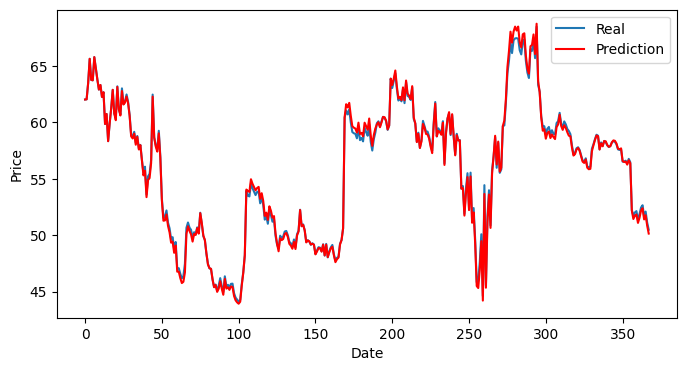

In [ ]:
plt.figure(figsize=(8, 4))
plt.plot(range(len(test_R)), test_R, label='Real')
plt.plot(range(len(forecasts_inverted)), forecasts_inverted, label='Prediction', color = 'red')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()